<a href="https://colab.research.google.com/github/VitorMazziero/Princ-pios-de-Bioprocessos/blob/main/Batelada_Simula%C3%A7%C3%A3o_do_Ac%C3%BAmulo_celular_Consumo_de_substrato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Batelada Simples

##Balanço de Massa Celular


Acúmulo = Entra - Sai + Geração - Consumo

⠀

Para Batelada Simples o balanço geral de células é simplificado para: 


> Acúmulo $=$ Geração

⠀⠀⠀⠀⠀⠀⠀⠀⠀$\therefore$

> $\frac{\mathrm{dm_{x}} }{\mathrm{d} t} = R_{x} = r_{x}V$⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Eq. (1)

---
Na qual: **Variação mássica celular = $\frac{\mathrm{dm_{x}} }{\mathrm{d} t}$** e **Geração mássica celular = $R_{x}$**

---

#Modelo de Monod (μ variável)

Como visto anteriormente, para batelada simples, a variação da concetração celular é dado por:
⠀

$\frac{\mathrm{dm_{x}} }{\mathrm{d} t}=\frac{\mathrm{dC_{x}V} }{\mathrm{d} t}\Rightarrow V\frac{\mathrm{dC_{x}} }{\mathrm{d} t}=r_{x}V\Rightarrow\frac{\mathrm{dC_{x}} }{\mathrm{d} t}=\mu C_{x}$       ⠀⠀⠀⠀⠀Eq. (2)

⠀

Para $\mu$ variável, como descrito por Monod (1949):

$\mu = \frac{\mu_{max}C_{s} }{K_{s}+C_{s}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (3)

⠀

A variação da concetração celular passa a ser descrita por:

$\frac{\mathrm{dC_{x}} }{\mathrm{d} t} = \frac{\mu_{max}C_{s} }{K_{s}+C_{s}}C_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (4)

Assim, é definida a função para integração numérica ***C_Var_Monod*** que descreve a variação de Cx com o tempo

In [ ]:
# Condições iniciais
μ_max = 0.3
Ks = 3
Cs = 30

def C_Var_Monod(Cx, t, μ):
    μ = μ_max*Cs/(Ks+Cs)
    dCxdt = μ*Cx #Eq. (3)
    return dCxdt

##Balanço de Massa de Substrato

Acúmulo = Entra - Sai + Geração - Consumo

⠀

Para Batelada Simples o balanço geral de substrato é simplificado para: 


> Acúmulo $=$ $-$Consumo

⠀⠀⠀⠀⠀⠀⠀⠀⠀$\therefore$

> $\frac{\mathrm{dm_{s}} }{\mathrm{d} t} = -R_{s} = -r_{s}V$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Eq. (5)

---
Na qual: **Variação mássica de substrato = $\frac{\mathrm{dm_{s}} }{\mathrm{d} t}$** e **Consumo de substrato = $R_{s}$**

---

De modo análogo a concentração celular, a variação da concentração de substrato é ditada pela taxa $r_{s}$, que é expressa pela Eq. (6):


$V\frac{\mathrm{dC_{s}} }{\mathrm{d} t}=-r_{s}V$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (6)

⠀

Para relacionar o consumo de substrato com a formação celular, é necessário definir o **rendimento de crescimento celular** $Y_{\frac{x}{s}}$ (a quantidade de célula que é formada por substrato consumido): 


$Y_{\frac{x}{s}} = \frac{r_{x}}{r_{s}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (7)


Assim, a variação da concentração de substrato pode ser descrita em função da concentração celular naquele instante, como descrito a seguir:
⠀
$\frac{\mathrm{dC_{s}} }{\mathrm{d} t} =-\frac{r_{x}}{Y_{\frac{x}{s}}}\Rightarrow -\frac{\mu_{max}C_{s} }{K_{s}+C_{s}}\frac{C_{x}}{Y_{\frac{x}{s}}}$

Portanto, a função para integração numérica ***C_Var_Monod*** que descreve a variação de Cx e Cs com o tempo passa a ser dada por:

##Simulação da variação da concentração celular e de substrato (Monod 1949)

In [9]:
import numpy as np
from numpy import arange

# Vetor tempo
t=np.arange(0, 12.5, 0.1) #Variação do tempo
print(t)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4]


In [15]:
# Condições iniciais
Cx0 = 1
Cs0 = 40
C0 = [Cx0, Cs0]
mi_max = 0.3
Ks = 3
Yxs = 0.2

def C_Var_Monod(C0, t, μ, Ks, Yxs):
    Cx = C0[0]
    Cs = C0[1]
    dCxdt = (mi_max*Cs/(Ks+Cs))*Cx
    dCsdt = -(mi_max*Cs/(Ks+Cs))*Cx/Yxs
    return dCxdt, dCsdt

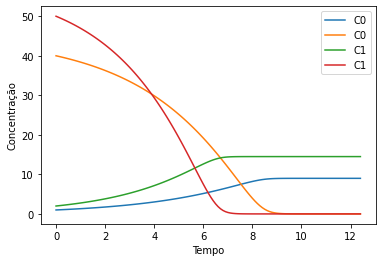

In [16]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Contadores
x = 0
p = 2 # Número de condições iniciais

while (x < p):
    args=(mi_max, Ks, Yxs)
    Result=odeint(C_Var_Monod, C0, t, args)
    # Selecionar parâmetros para variar:
    C0[0] += 1
    C0[1] += 10
    mi_max=mi_max+0.05
    Ks=Ks+1
    Yxs=Yxs+0.05
    # Geração das curvas
    plt.plot(t, Result, label='C' + str(x))
    #print ('Cx' + str(x) + str(Result[0]))
    #print ('Cs' + str(x) + str(Result[1]))
    x+=1

plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()